# Problem Set 3b

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

## Problem 1

BC Hydro imports/exports electricity from/to the US and Alberta. The data file `hydro.csv` includes total energy flow (in MWh) in/out of the BC Hydro system in 2022.

* Import the data and plot the histogram of energy flows.
* Find a kernel density function for the distribution of energy input/output and plot the function with the histogram.
* Use the kernel density function to determine how often BC Hydro is importing electricity.
* Define a new random variable $Y = \frac{1}{1000} \sum_{i=1}^{8760} X_i$ where each $X_i$ is the energy imported/exported in a 10 minute interval. Assume each $X_i$ is independent and is given by the kernel density function computed in the previous step. The variable $Y$ is the total yearly energy exported/imported and the units are GWh. Use the kernel density function to generate 2000 samples of $Y$. Find a kernel density function for the distribution of $Y$. (Note: there are 8760 hours in a year.)
* Find the values $A$ and $B$ such that $P(A < Y < B) = 0.9$.

Source: [BC Hydro](https://www.bchydro.com/energy-in-bc/operations/transmission/transmission-system/actual-flow-data/historical-data.html)

**Solution**

Import the data:

In [2]:
df = pd.read_csv('hydro.csv')

In [3]:
df.head()

,month,day,hour,energy
0,1,1,1,1950
1,1,1,2,1935
2,1,1,3,1916
3,1,1,4,1846
4,1,1,5,1820


Plot the histogram of energy flow:

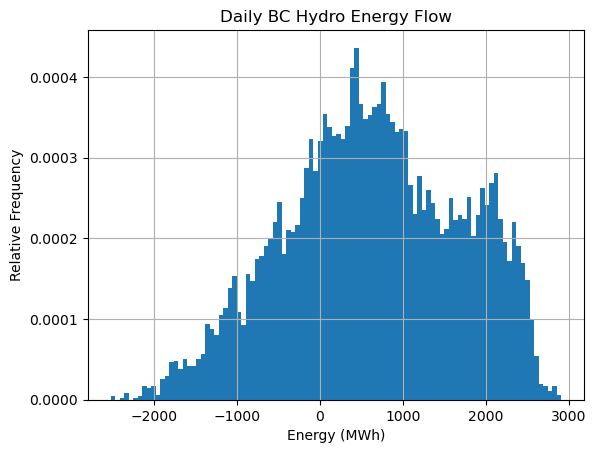

In [5]:
df['energy'].hist(bins=100,density=True)
plt.title('Daily BC Hydro Energy Flow')
plt.xlabel('Energy (MWh)'), plt.ylabel('Relative Frequency')
plt.show()

Compute kernel density function and plot with histogram:

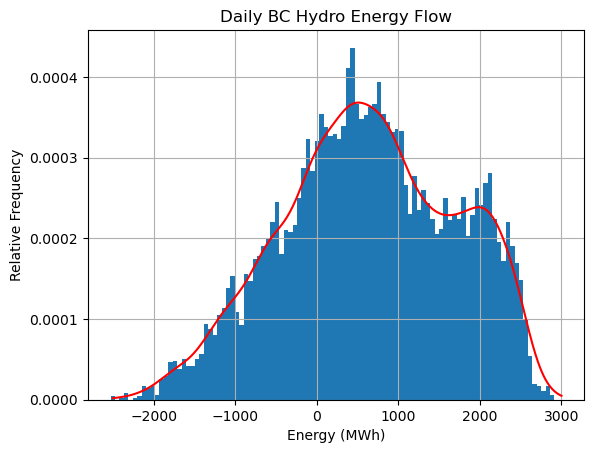

In [8]:
kdeE = stats.gaussian_kde(df['energy'])
df['energy'].hist(bins=100,density=True)
x = np.linspace(-2500,3000,500)
plt.plot(x,kdeE.pdf(x),'r')
plt.title('Daily BC Hydro Energy Flow')
plt.xlabel('Energy (MWh)'), plt.ylabel('Relative Frequency')
plt.show()

Compute the probability $P(E < 0)$:

In [10]:
kdeE.integrate_box_1d(-3000,0)

0.2801563809585425

Compute random samples of yearly energy imports/exports:

In [11]:
Ys = []
for _ in range(2000):
    Y = np.sum(kdeE.resample(size=24*365))/1000
    Ys.append(Y)

Fit kernel density function to $Y$ samples:

In [12]:
kdeY = stats.gaussian_kde(Ys)

Plot the distribution of $Y$:

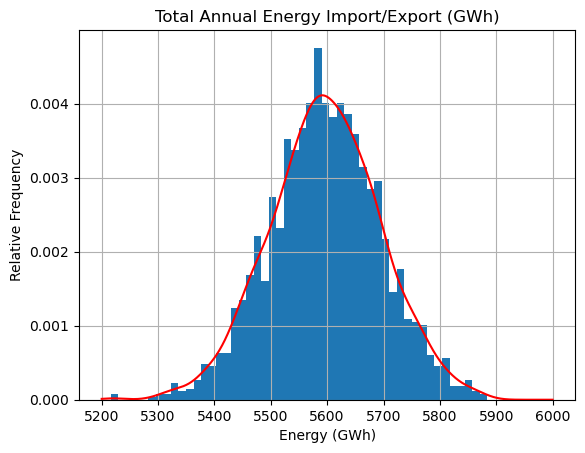

In [13]:
x = np.linspace(5200,6000,1000)
plt.hist(Ys,bins=50,density=True)
plt.plot(x,kdeY.pdf(x),'r')
plt.title('Total Annual Energy Import/Export (GWh)')
plt.xlabel('Energy (GWh)'), plt.ylabel('Relative Frequency'), plt.grid(True)
plt.show()

Compute the mean $\mu_Y$ of $Y$ and find an interval around the mean such that $P(\mu_Y-a<E<\mu_Y+a)$:

In [14]:
from scipy.integrate import quad

In [15]:
mean,_ = quad(lambda x: x*kdeY.pdf(x),5000,6000)

In [16]:
mean

5596.368239445947

In [24]:
a = 166.15
kdeY.integrate_box_1d(mean-a,mean+a)

0.9000794004745145

# Problem 2

The data file `temperature.csv` includes daily average temperature in Vancouver.

* Import the data and plot the histogram of temperature.
* Find a kernel density function for the distribution of temperature and plot the function with the histogram.
* Use the kernel density function to determine how often the temperature is above 25 degrees Celsius.
* Suppose the daily cost of heating/cooling a home is proportional to $|T - 18|$ where $T$ is the average daily temperature. Define a new random variable $Y = C_0 \sum_{i=1}^{365} |T_i - 18|$ where each $T_i$ is average temperature on day $i$ and $C_0$ is the heating/cooling cost per degree Celsius. Assume each $T_i$ is independent and is given by the kernel density function of temperature computed in the previous step. The variable $Y$ is the total yearly heating/cooling cost. Use the kernel density function to generate 2000 samples of $Y$. Find a kernel density function for the distribution of $Y$.
* Find the values $A$ and $B$ such that $P(A < Y < B) = 0.9$.

Source: [Weather Dashboard for Vancouver](https://vancouver.weatherstats.ca/download.html)

Import the data:

In [25]:
df = pd.read_csv('temperature.csv')

In [26]:
df.head()

,year,month,day,temperature
0,2023,10,26,4.75
1,2023,10,25,7.30
2,2023,10,24,7.69
3,2023,10,23,8.19
4,2023,10,22,8.85


Compute kernel density function for temperature and plot with histogram:

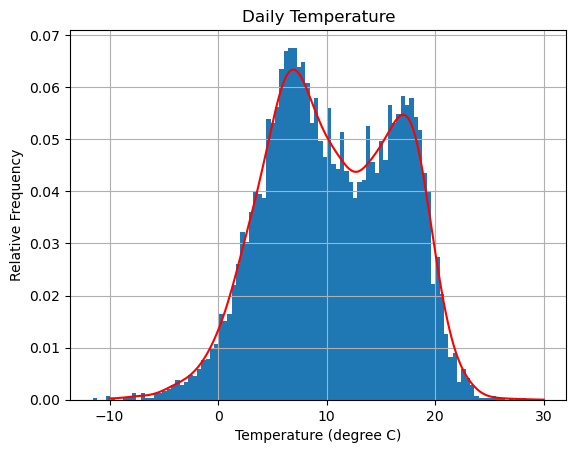

In [27]:
df['temperature'].hist(bins=100,density=True)
kdeT = stats.gaussian_kde(df['temperature'])
x = np.linspace(-10,30,200)
plt.plot(x,kdeT.pdf(x),'r')
plt.title('Daily Temperature')
plt.xlabel('Temperature (degree C)'), plt.ylabel('Relative Frequency'), plt.grid(True)
plt.show()

Compute $P(T > 25)$:

In [28]:
kdeT.integrate_box_1d(25,50)

0.0009797742290337263

Compute random samples of total yearly heating/cooling costs:

In [29]:
C0 = 1
Ys = []
for _ in range(2000):
    Y = C0*np.sum(np.abs(kdeT.resample(size=365) - 18))
    Ys.append(Y)

Plot distribution of $Y$ and fit kernel density function:

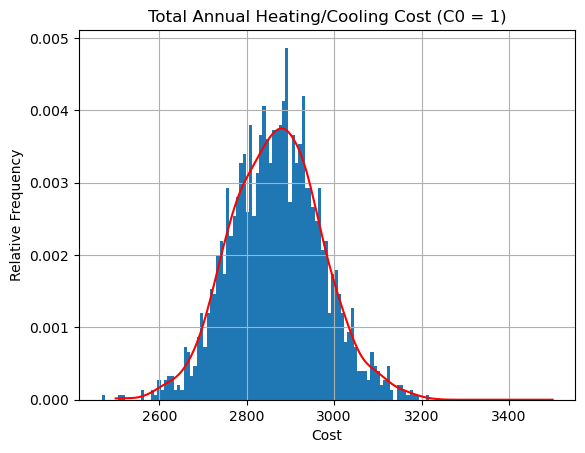

In [31]:
plt.hist(Ys,bins=100,density=True)
kdeY = stats.gaussian_kde(Ys)
x = np.linspace(2500,3500,200)
plt.plot(x,kdeY.pdf(x),'r')
plt.title('Total Annual Heating/Cooling Cost (C0 = 1)')
plt.xlabel('Cost'), plt.ylabel('Relative Frequency'), plt.grid(True)
plt.show()

In [32]:
mean,_ = quad(lambda x: x*kdeY.pdf(x),2500,3300)

In [33]:
mean

2865.806604876429

In [35]:
a = 175.92
kdeY.integrate_box_1d(mean-a,mean+a)

0.9054247882828294